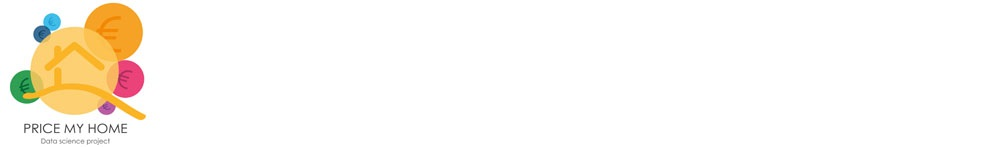

> ### <font color= "1F284B" >**Scraping y procesamiento de la información**</font><font color= "3B4D90" >_Código, almacenamiento, apertura y tratamiento de datos.</font>

In [192]:
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle 
import os
import pandas as pd

##### <font color= "1F284B" >PASO 1. Obtener la dirección Web de la página a scrapear.</font>

In [ ]:
chrome_driver = "chromedriver"
options = webdriver.ChromeOptions()
options.add_argument('--incognito')
driver = webdriver.Chrome(executable_path=chrome_driver,options = options)
url= "https://www.pisos.com/venta/pisos-madrid_capital_centro/1/"
driver.get(url)
response = requests.get(url)

In [ ]:
print(response)
print(bool(response))
soup = BeautifulSoup(response.text, "html.parser")

##### <font color= "1F284B" >PASO 2. Creación del código para obtener y guardar los datos.</font>

<font color= "1F284B" >- El conjunto de datos obtenido se almacena en un archivo .txt.</font>

##### <font color= "1F284B" >PASO 3. Scraping a de la información para distintas webs.</font>

<font color= "1F284B" >- Habitaclia.</font>

In [ ]:
for j in range(2,924):
    url = "https://www.habitaclia.com/viviendas-madrid-"+str(j)+".htm"
    driver.get(url)
    response = requests.get(url)
        
    sopa = driver.find_element_by_xpath("//*[@id='js-list']/section/div/section[1]")
    sopa1= str(sopa.text.replace("€/m","eurometro").split("Anuncio Premium+ actualizado"))
    mi_path = "habitacliaordenado.txt"
    f = open(mi_path, 'a+')
    f.write(sopa1)
f.close()
sleep(randint(5,9))


<font color= "1F284B" >- Procesamiento de la información - Habitaclia.</font>

In [58]:
archivo_nombre="habitacliaordenado.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    text1=archivo.read()


In [84]:
text1= str(text1)

In [102]:
text2 = text1.replace("\\x80\\\\","€")

In [104]:
text3 = text2.replace("Avísame si baja"," ").replace("VISITA VIRTUAL","").replace("actualizado","").replace("hace","")

In [108]:
text4 = text3.replace("Anuncio Premium+","").replace("horas","").replace("ayer","").split("€")

In [153]:
text4[2].split("\\\\n")[5]

'Madrid - Casco Histórico de Vallecas'

In [154]:
text4[2].split("\\\\n")[-1]

'118.000 '

In [116]:
text4[2].split("\\\\n")[6].split(" - ")

['44m2', '1 habitacion', '1 baño', '2.682eurometro']

In [146]:
text4[2].split("\\\\n")[6].split(" - ")[3]

str

In [5]:
del text3[0]

In [150]:
lista_zona2 = []
lista_precio2 = []
lista_hab2 = []
lista_baño2 = []
lista_metros2 = []
lista_eum2= []
try:
    for i in range(9999):
        lista_zona2.append(text4[i].split("\\\\n")[5])
        lista_precio2.append(text4[i].split("\\\\n")[-1])
        lista_hab2.append(text4[i].split("\\\\n")[6].split(" - ")[1]) 
        lista_baño2.append(text4[i].split("\\\\n")[6].split(" - ")[2]) 
        lista_metros2.append(text4[i].split("\\\\n")[6].split(" - ")[0])
        lista_eum2(text4[i].split("\\\\n")[6].split(" - ")[3])
except: ValueError:
    pass

SyntaxError: invalid syntax (<ipython-input-150-00d84d541b5a>, line 15)

<font color= "1F284B" >- A través de splits y replaces podemos guardar la información en listas para crear un dataframe.</font>

<font color= "1F284B" >- Pisos.com .</font>

In [ ]:
for i in range(1,30):
    url = "https://www.pisos.com/venta/pisos-madrid_capital_centro/"+str(i)
    driver.get(url)
    response = requests.get(url)
    sopa = driver.find_element_by_xpath("/html/body/div[4]/div[2]/div")
    lista_total = sopa.text.replace("Publicidad","").split("\n")
    mi_path = "Idealista/pisos.txt"
    f = open(mi_path, 'a+')

    for i in lista_total:
        f.write(i)

    f.close()
sleep(randint(5,9))

<font color= "1F284B" >- Procesado de la información de Pisos.com .</font>

In [7]:
archivo_nombre="pisos.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    text10=archivo.read()


In [70]:
text20 = text10.replace("\x80","€").replace(" Avísame si baja "," ").replace(" VISITA VIRTUAL ","").replace("actualizado","").replace("hace","")

In [78]:
text30 = text20.replace("Solicita tu hipoteca"," ").replace("m²","m² ").replace("planta","planta ").replace("Oportunidad","  ")

In [83]:
text40= text30.replace(")",") ").replace("m²","m² ").replace("Exclusivo","  ").replace("Palacio","Palacio ").replace("Embajadores-Lavapiés","Embajadores-Lavapiés ")

In [84]:
text50= text40.split("CONTACTAR")

In [91]:
text50[220]

'18297.000 € Piso en calle de Amaniel, 27Universidad-Malasaña (Distrito Centro. Madrid Capital) 50 m²  111ª planta 5.940 €/m²  '

<font color= "1F284B" >- Idealista .</font>

<font color= "1F284B" >- Procesado de la información Obtenida a mano .</font>

In [11]:
archivo_nombre="Userapagina1.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    text100=archivo.read()


In [12]:
text200= text100.replace("â\x82","€").replace("mÂ²","m2").replace("CaracterÃ\xadsticas bÃ¡sicas","caracteristicas")

In [13]:
text300= text200.replace("baÃ±o","baño").replace("OrientaciÃ³n","orientacion").replace("CalefacciÃ³n","calefaccion")

In [39]:
text400= text300.replace("CertificaciÃ³n","certificacion").replace("energÃ©tica","energetica").replace("\n"," ")

In [92]:
text500= text400.replace("Ver mapa"," ").replace("Calcular hipoteca  Estudiar hipoteca"," ")

In [93]:
texto_final = text500.split("***********************************************")

In [101]:
lista_final0 = []
for i in range(len(texto_final)):
    lista_final0.append(texto_final[i].split("caracteristicas"))

In [104]:
lista_final= []
for i in range(len(lista_final0)):
    lista_final.append(lista_final0[i][0])

In [108]:
lista_final[0]

'Piso en venta en Orcasitas Usera, Madrid   173.000 €¬    90 m2 3 hab. 5Âª planta exterior con ascensor '

<font color= "1F284B" >- Departiculares .</font>

In [112]:
archivo_nombre="tucasa.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    texto=archivo.read()

In [113]:
texto1= texto.replace("\x80","€").replace("Piso en ","").replace("\n"," ").replace("Avísame si baja"," ").replace("VISITA VIRTUAL","").replace("actualizado","").replace("hace","")

<font color= "1F284B" >- Yaencontré .</font>

In [28]:
archivo_nombre="ya.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    textoo=archivo.read()

In [29]:
textoo1= textoo.replace("\x80","€").replace("Piso en ","").replace("Apartamento en ","").split("************************")

In [206]:
textoo1[0].split("\n")

['Palos de Moguer, Madrid',
 '409.000 €',
 '3',
 '1',
 '94m²',
 'NO COBRAMOS HONORARIOS AL COMPRADOR. TRATO DIRECTO CON LA PROPIEDAD, TOTAL TRANSPARENCIA. PRECIO NEGOCIABLE. Reserva tu visita sin compromiso. Piso de 94m² en el edificio más representativo de la zona de Atocha, una ubicación privilegiada en una constru...',
 '91 487 63 71Contactar']

In [200]:
lista_zona = []
lista_precio = []
lista_hab = []
lista_baño = []
lista_metros = []
lista_otras= []
for i in range(len(textoo1)):
    try:
        lista_zona.append(textoo1[i].split("\n")[0])
        lista_precio.append(textoo1[i].split("\n")[1])
        lista_hab.append(textoo1[i].split("\n")[2])
        lista_baño.append(textoo1[i].split("\n")[3])
        lista_metros.append(textoo1[i].split("\n")[4])
    except:
        pass

In [201]:
print(len(lista_zona))
print(len(lista_precio))
print(len(lista_hab)) 
print(len(lista_baño))
print(len(lista_metros)) 


4540
4539
4539
4539
4539


In [209]:
len(lista_zona[0:4539])

4539

In [210]:
lista_eum=[]
for i in range(4539):
    lista_eum.append(i)

<font color= "1F284B" >- Creación del DataFrame .</font>

In [212]:
df1 = pd.DataFrame({"Barrio":lista_zona[0:4539],"Metros Cuadrados":lista_metros, 
                   "Habitaciones":lista_hab
                  ,"Baños":lista_baño, "PrecioxMetro2":lista_eum,"Precio":lista_precio})

<font color= "1F284B" >- Guardamos el df a excel .</font>

In [213]:
df1.to_excel("Yaencontre.xlsx",
             sheet_name='Sheet_name_1') 

<font color= "1F284B" >- Globaliza .</font>

In [39]:
archivo_nombre="global.txt"
with open(archivo_nombre,"r",  encoding='latin-1') as archivo: 
    tixto=archivo.read()

In [41]:
tixto = tixto.replace("\x80","€").replace("Piso en ","").replace("Apartamento en ","").split("************************")

In [45]:
len(tixto)

636

In [178]:
tixto[414].split("\n")

['1.150.000 €',
 'Salamanca, Madrid',
 'A la altura de Juan Bravo, junto a colegios, tiendas exclusivas y restaurantes, edificio clásico, portal de lujo, vivienda...',
 '185m2',
 '3',
 '3',
 'Con ascensor']

In [183]:
lista_zona1 = []
lista_precio1 = []
lista_hab1 = []
lista_baño1 = []
lista_metros1 = []
nan= "NaN"
for i in range(len(tixto)):
    try:
        lista_zona1.append(tixto[i].split("\n")[1])
        lista_precio1.append(tixto[i].split("\n")[0])
        lista_hab1.append(tixto[i].split("\n")[4])
        lista_baño1.append(tixto[i].split("\n")[5])
        lista_metros1.append(tixto[i].split("\n")[3])
    except:
        pass
        
        

In [184]:
print(len(lista_zona1))
print(len(lista_precio1))
print(len(lista_hab1)) 
print(len(lista_baño1))
print(len(lista_metros1)) 



635
635
626
615
615


In [188]:
len(lista_zona1[0:615])

615

In [190]:
lista_eum1=[]
for i in range(616):
    lista_eum1.append(i)

In [ ]:
lista_zona1[0:615]
lista_precio1[0:615]
lista_hab1[0:615]
lista_baño1[0:615]
lista_metros1[0:615]

<font color= "1F284B" >-Obtención del DataFrame .</font>

In [194]:
df = pd.DataFrame({"Barrio":lista_zona1[0:615],"Metros Cuadrados":lista_metros1[0:615], 
                   "Habitaciones":lista_hab1[0:615]
                  ,"Baños":lista_baño1[0:615], "PrecioxMetro2":lista_eum1[0:615],"Precio":lista_precio1[0:615]})

<font color= "1F284B" >- Guardamos el Df a Excel y CSv.</font>

In [196]:
df.to_excel("Globaliza.xlsx",
             sheet_name='Sheet_name_1') 

In [197]:
df.to_csv("Globaliza.csv")